$s$

In [1]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/slider_cranck
    out.clear_output()


In [2]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [3]:
m.show_data_flow()

Output()

In [6]:
m.object_predecessors('jcs_A_sph')

Output()

In [4]:
m.bodies

rbs_connecting    rbs_connecting
rbs_cranck            rbs_cranck
rbs_ground            rbs_ground
rbs_slider            rbs_slider
dtype: object

In [5]:
m.joints

jcs_A_sph      <constraints.spherical object at 0x00000215821...
jcs_B_uni      <constraints.universal object at 0x00000215821...
jcs_C_trans    <constraints.translational object at 0x0000021...
jcs_O_rev      <constraints.revolute object at 0x000002158216...
dtype: object

In [3]:
from constraints import translational_actuator
from solvers import dds

In [8]:
slider_actuator = translational_actuator('act',m.joints['jcs_slider_ground_trans'])
slider_actuator.name

'act'

In [7]:
q0  = pd.concat([i.dic    for i in m.bodies])
qd0 = pd.concat([i.qd0()    for i in m.bodies])
topology_writer(m.bodies,m.joints,[],[],'slider_crank_data_dyn')


pos_df,vel_df,acc_df,reactionss=dds(q0,qd0,m.bodies,m.joints,[],[],'slider_crank_data_dyn',0.15,0.001)

DOF : 1 

Independent Coordinates are: ['rbs_slider.x'] with indices: [21] 

time_step: 0
[ 210.    0.]
time_step: 1
[ 210.00151652    3.03304283]


C:\Users\khale\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dop853: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


time_step: 2
[ 210.00606606    6.06603473]
time_step: 3
[ 210.01364851    9.09887382]
time_step: 4
[ 210.02426368   12.13145815]
time_step: 5
[ 210.03791125   15.16368564]
time_step: 6
[ 210.05459082   18.19545398]
time_step: 7
[ 210.07430188   21.22666059]
time_step: 8
[ 210.09704381   24.25720254]
time_step: 9
[ 210.1228159    27.28697645]
time_step: 10
[ 210.15161733   30.31587846]
time_step: 11
[ 210.18344717   33.34380414]
time_step: 12
[ 210.2183044    36.37064837]
time_step: 13
[ 210.25618787   39.39630536]
time_step: 14
[ 210.29709636   42.42066847]
time_step: 15
[ 210.34102851   45.44363018]
time_step: 16
[ 210.38798286   48.46508203]
time_step: 17
[ 210.43795786   51.4849145 ]
time_step: 18
[ 210.49095183   54.50301693]
time_step: 19
[ 210.54696298   57.51927746]
time_step: 20
[ 210.60598941   60.53358292]
time_step: 21
[ 210.66802911   63.54581875]
time_step: 22
[ 210.73307995   66.55586889]
time_step: 23
[ 210.80113969   69.5636157 ]
time_step: 24
[ 210.87220597   72.568939

C:\Users\khale\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dop853: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


[ 233.42218416  183.12037676]
time_step: 134
[ 233.42218416  183.12037676]
time_step: 135
[ 233.42218416  183.12037676]
time_step: 136
[ 233.42218416  183.12037676]
time_step: 137
[ 233.42218416  183.12037676]
time_step: 138
[ 233.42218416  183.12037676]
time_step: 139
[ 233.42218416  183.12037676]
time_step: 140
[ 233.42218416  183.12037676]
time_step: 141
[ 233.42218416  183.12037676]
time_step: 142
[ 233.42218416  183.12037676]
time_step: 143
[ 233.42218416  183.12037676]
time_step: 144
[ 233.42218416  183.12037676]
time_step: 145
[ 233.42218416  183.12037676]
time_step: 146
[ 233.42218416  183.12037676]
time_step: 147
[ 233.42218416  183.12037676]
time_step: 148
[ 233.42218416  183.12037676]
time_step: 149
[ 233.42218416  183.12037676]


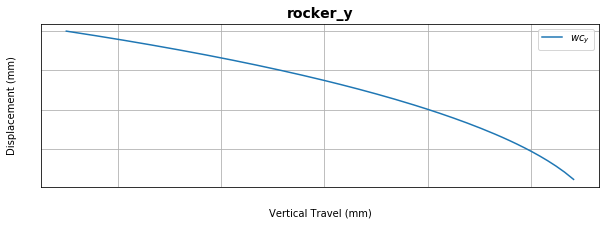

In [14]:
figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(pos_df['rbs_cranck.x'][:129],pos_df['rbs_cranck.z'][:129],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [31]:
slider_actuator = translational_actuator('act',m.joints['jcs_C_trans'])
ac = pd.Series([slider_actuator],index=['act'])
q0   = pd.concat([i.dic    for i in m.bodies])
topology_writer(m.bodies,m.joints,ac,[],'slider_crank_data_kin')
t=np.linspace(0,2*np.pi,100)
slider_actuator.pos_array=12*np.sin(t)


pos_df,vel_df,acc_df,itr=kds(m.bodies,m.joints,ac,'slider_crank_data_kin',t)


Running System Kinematic Analysis:
Progress: [                         ] 1% of 100 steps.Recalculating Jacobian
Progress: [=========================] 100% of 100 steps.

In [4]:
crank_actuator = rotational_drive('act',m.joints['jcs_O_rev'])
ac = pd.Series([crank_actuator],index=['act'])
topology_writer(m.bodies,m.joints,ac,[],'slider_crank_data_kin')
t=np.linspace(0,2*np.pi,100)
crank_actuator.pos_array=np.deg2rad(30)*np.sin(t)


pos_df,vel_df,acc_df,itr=kds(m.bodies,m.joints,ac,'slider_crank_data_kin',t)


Running System Kinematic Analysis:
Progress: [                         ] 3% of 100 steps.

E:\Main\Programming\Python\My Projects\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:224: RuntimeWarning: overflow encountered in double_scalars
  eq=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
E:\Main\Programming\Python\My Projects\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:248: RuntimeWarning: overflow encountered in double_scalars
  eq7=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
C:\Users\khale\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


Progress: [=========================] 100% of 100 steps.

In [7]:
m.joints['jcs_O_rev'].j_body.dcm.dot(m.joints['jcs_O_rev'].vji)

array([[ 0.70710678],
       [ 0.        ],
       [-0.70710678]])

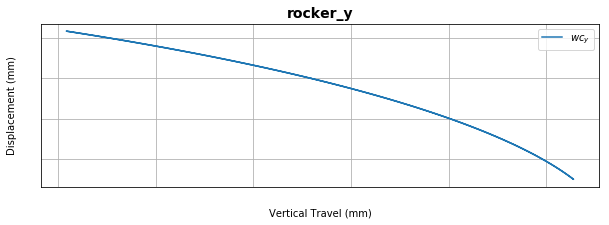

In [52]:


figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')

#plt.plot(np.rad2deg(crank_actuator.pos_array),pos_df['rbs_slider.x'][1:],label=r'$wc_{y}$')
plt.plot(pos_df['rbs_cranck.x'][1:],pos_df['rbs_cranck.z'][1:],label=r'$wc_{y}$')

plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [37]:
import sympy as sy
sy.init_printing(True)

In [38]:
t=sy.Symbol('t')
theta=sy.Function('theta')(t)
sy.cos(theta)

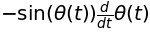

In [19]:
sy.diff(sy.cos(theta),t,1)

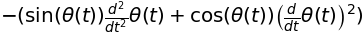

In [20]:
sy.diff(sy.cos(theta),t,2)